<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team1/blob/master/Week7/HyewonJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("/content/"))
import sys
print('Python version ->', sys.version)
print('Numpy version ->' , np.__version__)
print('Pandas version ->', pd.__version__)

['.config', 'submission.csv', 'movies_train.csv', 'movies_test.csv', 'sample_data']
Python version -> 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Numpy version -> 1.21.6
Pandas version -> 1.3.5


In [17]:
train_df = pd.read_csv('/content/movies_train.csv')
test_df = pd.read_csv('/content/movies_test.csv')

In [18]:
train = train_df.copy()
test = test_df.copy()

In [19]:
print("train.csv. Shape: ", train.shape)
print("test.csv, Shape: ", test.shape)

train.csv. Shape:  (600, 12)
test.csv, Shape:  (243, 11)


In [20]:
train_null = train.drop('box_off_num', axis = 1).isnull().sum()/len(train)*100
test_null = test.isnull().sum()/len(test)*100
pd.DataFrame({'train_null_count': train_null, 'test_null_count': test_null})

,train_null_count,test_null_count
title,0.0,0.000000
distributor,0.0,0.000000
genre,0.0,0.000000
release_time,0.0,0.000000
time,0.0,0.000000
screening_rat,0.0,0.000000
director,0.0,0.000000
dir_prev_bfnum,55.0,55.967078
dir_prev_num,0.0,0.000000
num_staff,0.0,0.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [23]:
test.loc[test['title'] == '슈퍼레이서 엔지', 'time'] = 63
train.drop([10, 311], inplace=True)

In [24]:
train['box_off_num'].describe()

count    5.980000e+02
mean     7.105431e+05
std      1.830608e+06
min      1.000000e+00
25%      1.311250e+03
50%      1.282300e+04
75%      4.811002e+05
max      1.426277e+07
Name: box_off_num, dtype: float64

box_off_num -> Skewness: 4.324482, Kurtosis: 21.865598,


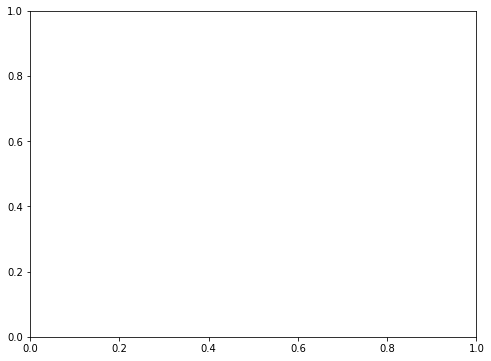

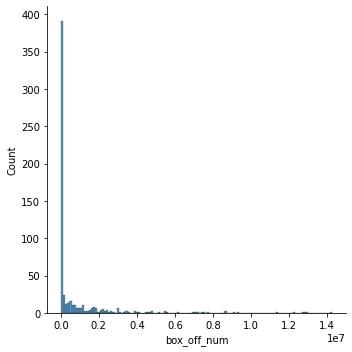

In [27]:
f, ax = plt.subplots(figsize = (8,6))
sns.displot(train['box_off_num'])
print("%s -> Skewness: %f, Kurtosis: %f," % ('box_off_num', train['box_off_num'].skew(), train['box_off_num'].kurt()))

In [28]:
train['box_off_num'] = np.log1p(train['box_off_num'])
print("%s -> Skewness: %f, Kurtosis: %f" % ('box_off_num', train['box_off_num'].skew(), train['box_off_num'].kurt()))

box_off_num -> Skewness: 0.128244, Kurtosis: -1.051438


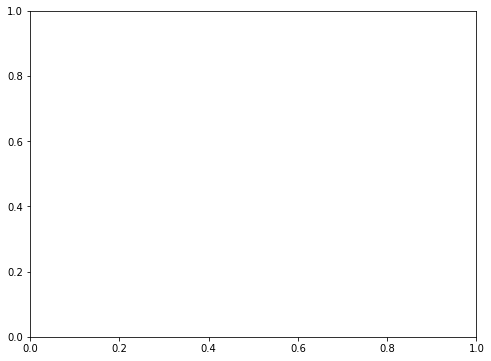

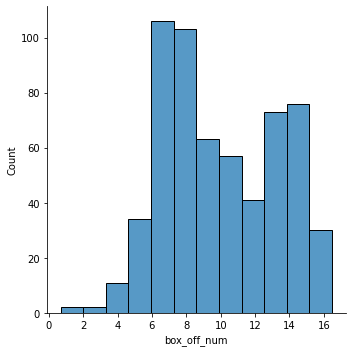

In [29]:
f, ax = plt.subplots(figsize=(8,6))
sns.displot(train['box_off_num'])

dir_prev_bfnum -> Skewness: 4.418835, Kurtosis: 30.071183


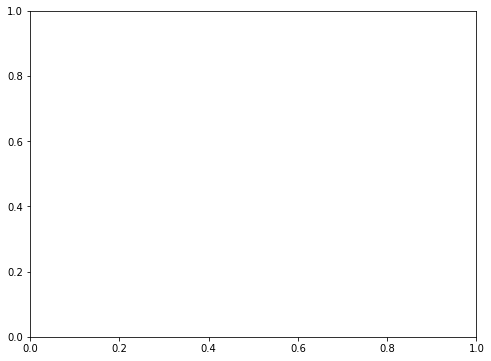

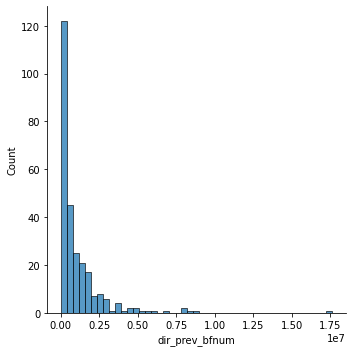

In [30]:
f, ax = plt.subplots(figsize = (8,6))
train_bfnum = train[train['dir_prev_bfnum'].notnull()]
sns.displot(train_bfnum['dir_prev_bfnum'])
print("%s -> Skewness: %f, Kurtosis: %f" % ('dir_prev_bfnum', train_bfnum['dir_prev_bfnum'].skew(), train_bfnum['dir_prev_bfnum'].kurt()))

In [31]:
all_data = pd.concat([train, test], sort = False).reset_index(drop=True)
print('Null count : ', all_data['dir_prev_bfnum'].isnull().sum())

bfnum_null = all_data[all_data['dir_prev_bfnum'].isnull()]

director_count = bfnum_null[['title', 'director']].groupby('director').count()
director_count = director_count.reset_index()
print('Director Null count: ', director_count['director'].count())

dire_1 = director_count[director_count['title']==1]['director']
for name in dire_1:
  all_data.loc[all_data['director']==name, 'dir_prev_bfnum'] = all_data.loc[all_data['director']==name, 'dir_prev_bfnum'].fillna(0)

Null count :  464
Director Null count:  362


In [32]:
print('Null count : ', all_data['dir_prev_bfnum'].isnull().sum())

bfnum_null = all_data[all_data['dir_prev_bfnum'].isnull()]

director_count = bfnum_null[['title', 'director']].groupby('director').count()
director_count = director_count.reset_index()

print('Director Null count : ', director_count['director'].count())

all_data['box_off_num'] = np.expm1(all_data['box_off_num'])

Null count :  171
Director Null count :  69


In [34]:
def director_bfnum(all_director):
  if pd.isnull(all_director.iloc[0,7]):
    all_director.isloc[0,7] = 0
  count = 1
  num = 0

  for i in range(1, len(all_director)):
    num += all_director['box_off_num'].iloc[i-1]
    bfnum = num/count
    all_director.iloc[i, 7] = bfnum
    count+=1
  return all_director

In [35]:
dire_2 = director_count['director']

all_data['box_off_num'].fillna(0, inplace = True)

for name in dire_2:
  all_director = all_data[all_data['director']==name].sort_values('release_time')
  all_data[all_data['director']==name] = director_bfnum(all_director)

AttributeError: ignored